**In this project, I will predict whether a customer will get the loan from bank or not 🙏**

Import Library 

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

load dataset

In [72]:
train=pd.read_csv('/content/drive/MyDrive/Data Science/Machine Learning/Loan Predction /Data/train_data.csv')
test=pd.read_csv('/content/drive/MyDrive/Data Science/Machine Learning/Loan Predction /Data/test_data.csv')

In [73]:
print(train.shape)
print(test.shape)

(614, 14)
(367, 13)


In [74]:
train.head(5)

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Dataset Processing ✈

In [75]:
print(train.columns)
print(test.columns)

Index(['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [76]:
train.drop(columns='Unnamed: 0',inplace=True)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [77]:
test.drop(columns='Unnamed: 0',inplace=True)
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


I don`t need different train and test data. So I will marge those dataset and below i will split this total dataset

In [78]:
train.Loan_Status=train.Loan_Status.map({'Y':1,'N':0}) #data labeling
Loan_status=train.Loan_Status #This will be the target value
loan_id=test.Loan_ID
# train.drop('Loan_status', inplace=True, axis=1) #Drop Loan_status columnm

In [79]:
train.drop(columns='Loan_Status', inplace=True, axis=1)

In [80]:
data=train.append(test)

In [81]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


This is the main dataset

## Dataset  Analysis ⚖

In [91]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

Null Value list 

In [92]:
data.Dependents.dtypes

dtype('O')

Object Type data

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 99.6+ KB


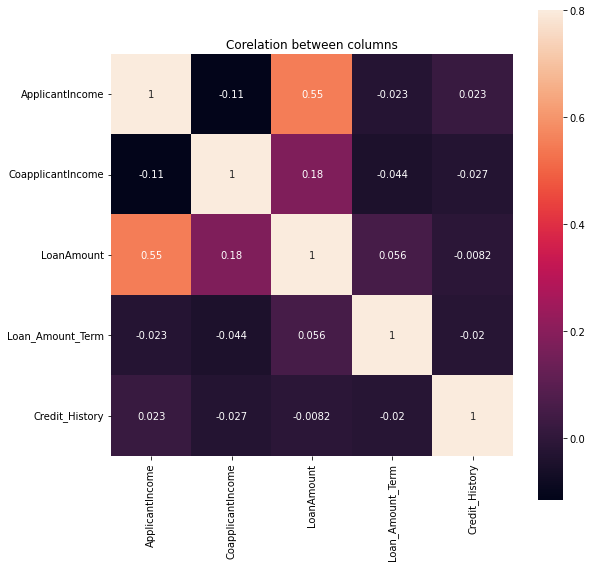

In [95]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True, annot=True)
plt.title('Corelation between columns')
plt.show()

## Label Encoding

Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [98]:
## Label encoding for gender
data.Gender=data.Gender.map({'Male':1,'Female':0})
data.Gender.value_counts()

1.0    775
0.0    182
Name: Gender, dtype: int64

In [99]:
## Labelling 0 & 1 for Marrital status
data.Married=data.Married.map({'Yes':1,'No':0})
data.Married.value_counts()

1.0    631
0.0    347
Name: Married, dtype: int64

In [102]:
## Labelling 0 & 1 for Dependents
print(data.Dependents.unique())
data.Dependents=data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
data.Dependents.value_counts()

['0' '1' '2' '3+' nan]


0.0    545
1.0    160
2.0    160
3.0     91
Name: Dependents, dtype: int64

In [103]:
## Labelling 0 & 1 for Education Status
data.Education=data.Education.map({'Graduate':1,'Not Graduate':0})
data.Education.value_counts()

1    763
0    218
Name: Education, dtype: int64

In [104]:
## Labelling 0 & 1 for Employment status
data.Self_Employed=data.Self_Employed.map({'Yes':1,'No':0})
data.Self_Employed.value_counts()

0.0    807
1.0    119
Name: Self_Employed, dtype: int64

In [105]:
## Labelling 0 & 1 for Property area
data.Property_Area=data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
data.Property_Area.value_counts()

1    349
2    342
0    290
Name: Property_Area, dtype: int64

In [106]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


All object catagory type column are labeled ✅

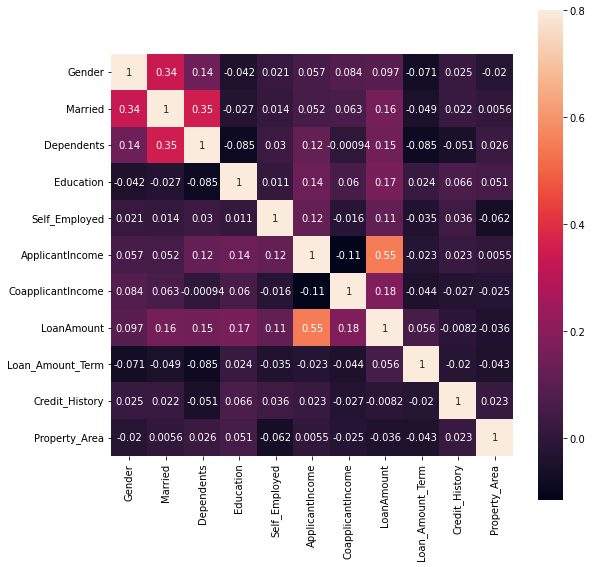

In [108]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True,annot=True)

Co-relation increased because off data labeling

### Fill null values

In this dataset there are many null values. There are many option to fill null values, also with customize value.

In [111]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

In [112]:
## Filling Gender with random number between 0-2
from random import randint 
data.Gender.fillna(np.random.randint(0,2),inplace=True)

In [113]:
data.Married.fillna(np.random.randint(0,2),inplace=True)


In [114]:
## Filling Dependents with median
data.Dependents.fillna(data.Dependents.median(),inplace=True)

In [115]:
data.Self_Employed.fillna(np.random.randint(0,2),inplace=True)


In [116]:
## Filling with median
data.LoanAmount.fillna(data.LoanAmount.median(),inplace=True)

In [117]:
# Filling with mean
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace=True)

In [118]:
data.Credit_History.fillna(np.random.randint(0,2),inplace=True)

In [119]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Dataset has no null value

In [120]:
data.sample(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
163,LP001911,0.0,0.0,0.0,1,0.0,2708,0.0,65.0,360.0,1.0,0
187,LP002056,1.0,1.0,2.0,1,0.0,9167,0.0,235.0,360.0,1.0,1
266,LP001877,1.0,1.0,2.0,1,0.0,4708,1387.0,150.0,360.0,1.0,1


In [121]:
## Dropping Loan ID from data, it's not useful
data.drop('Loan_ID',inplace=True,axis=1)

Now it`s time to split the dataset 🔨

In [127]:
feature=data.iloc[:614]
target=Loan_status

In [132]:
x_train,x_test,y_train,y_test=train_test_split(feature,target, test_size=0.1, random_state=101)

In [133]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(552, 11)
(62, 11)
(552,)
(62,)


### Train Different types of Machine Learning Algorithm

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Fit  all ML Models and store report into array

In [135]:
models=[]
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Linear Discriminant Analysis",LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Support Vector Classifier",SVC()))
models.append(("K- Neirest Neighbour",KNeighborsClassifier()))
models.append(("Naive Bayes",GaussianNB()))

In [136]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [150]:
for name,model in models:
    kfold=KFold(n_splits=10)
    cv_result=cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    result.append(cv_result)
    names.append(name)
    print("%s %f" % (name,cv_result.mean()))
    print()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic Regression 0.813442

Decision Tree 0.701201

Linear Discriminant Analysis 0.813474

Random Forest 0.786201

Support Vector Classifier 0.688539

K- Neirest Neighbour 0.639740

Naive Bayes 0.793539



Logistic Regration algorithm`s accuracy is best, So i choosed that ❤

In [ ]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)

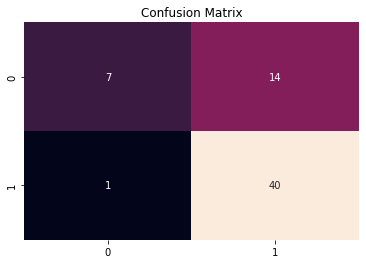

In [158]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True, cbar=False)
plt.title('Confusion Matrix')
plt.show()

In [160]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.33      0.48        21
           1       0.74      0.98      0.84        41

    accuracy                           0.76        62
   macro avg       0.81      0.65      0.66        62
weighted avg       0.79      0.76      0.72        62



Now Test with unknow data

In [161]:
test_data=data.iloc[614:]
test_data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
240,1.0,0.0,0.0,0,0.0,3844,0.0,105.0,360.0,1.0,2
194,1.0,1.0,1.0,1,0.0,10000,2690.0,412.0,360.0,1.0,1
251,1.0,1.0,0.0,1,0.0,3863,0.0,70.0,300.0,1.0,1
0,1.0,1.0,0.0,1,0.0,5720,0.0,110.0,360.0,1.0,2
344,1.0,0.0,0.0,1,0.0,6858,0.0,176.0,360.0,1.0,0


In [162]:
prediction = LR.predict(test_data)
print(prediction)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


Model predict this value ⛳

Test with single value

In [164]:
LR.predict([[1,1,0,1,0,10000,2400,512,300,1,2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1])

Save ML model

In [166]:
import pickle
# now you can save it to a file
file = 'Bank_loan_ML_Model1.pkl'
with open(file, 'wb') as f:
    pickle.dump(LR, f)

In [167]:
# Load Model
with open('/content/Bank_loan_ML_Model1.pkl', 'rb') as f:
    lr_model = pickle.load(f)

In [168]:
lr_model.predict([[0.0,	0.0,	0.0,	1,	0.0,	4230,	0.0,	112.0,	360.0,	1.0,	1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1])